In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

result_dir = '/home/dchenbs/workspace/DirectSAM/outputs/effective_boundary_recall'
datasets = os.listdir(result_dir)

results = {}

for dataset in datasets:
    results[dataset] = {}
    models = os.listdir(os.path.join(result_dir, dataset))
    models = set([sub_folder.split('-threshold')[0] for sub_folder in models])

    for model in models:
        results[dataset][model] = {}

    for model in models:
        for thereshod in os.listdir(os.path.join(result_dir, dataset, model)):

            files = os.listdir(os.path.join(result_dir, dataset, model, thereshod))
            files = [file for file in files if file.endswith('.csv')]
            if len(files) != 0:
                files.sort()
                line = open(os.path.join(result_dir, dataset, model, thereshod, files[-1])).readlines()[-1].split('\t')

                mean_recall = float(line[-2]) if line[-2] != '' else 0
                mean_precision = float(line[-1].strip()) if line[-1] != '' else 0
                results[dataset][model][float(thereshod.split('@')[1])] = [mean_recall, mean_precision]


EntitySeg
1010-1155-1024px-from-chendelong_DirectSAM-gen1-1024px-1008-checkpoint-20000
1016-0134-1024px-from-chendelong_DirectSAM-gen2-1024px-1014-checkpoint-10000
chendelong-DirectSAM-1800px-0424
chendelong-DirectSAM-b0-1024px-sa1b-2ep-1016
chendelong-DirectSAM-gen1-1024px-1008
chendelong-DirectSAM-gen2-1024px-1014
	chendelong-DirectSAM-1800px-0424:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
	chendelong-DirectSAM-gen1-1024px-1008:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
	chendelong-DirectSAM-gen2-1024px-1014:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
	chendelong-DirectSAM-b0-1024px-sa1b-2ep-1016:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


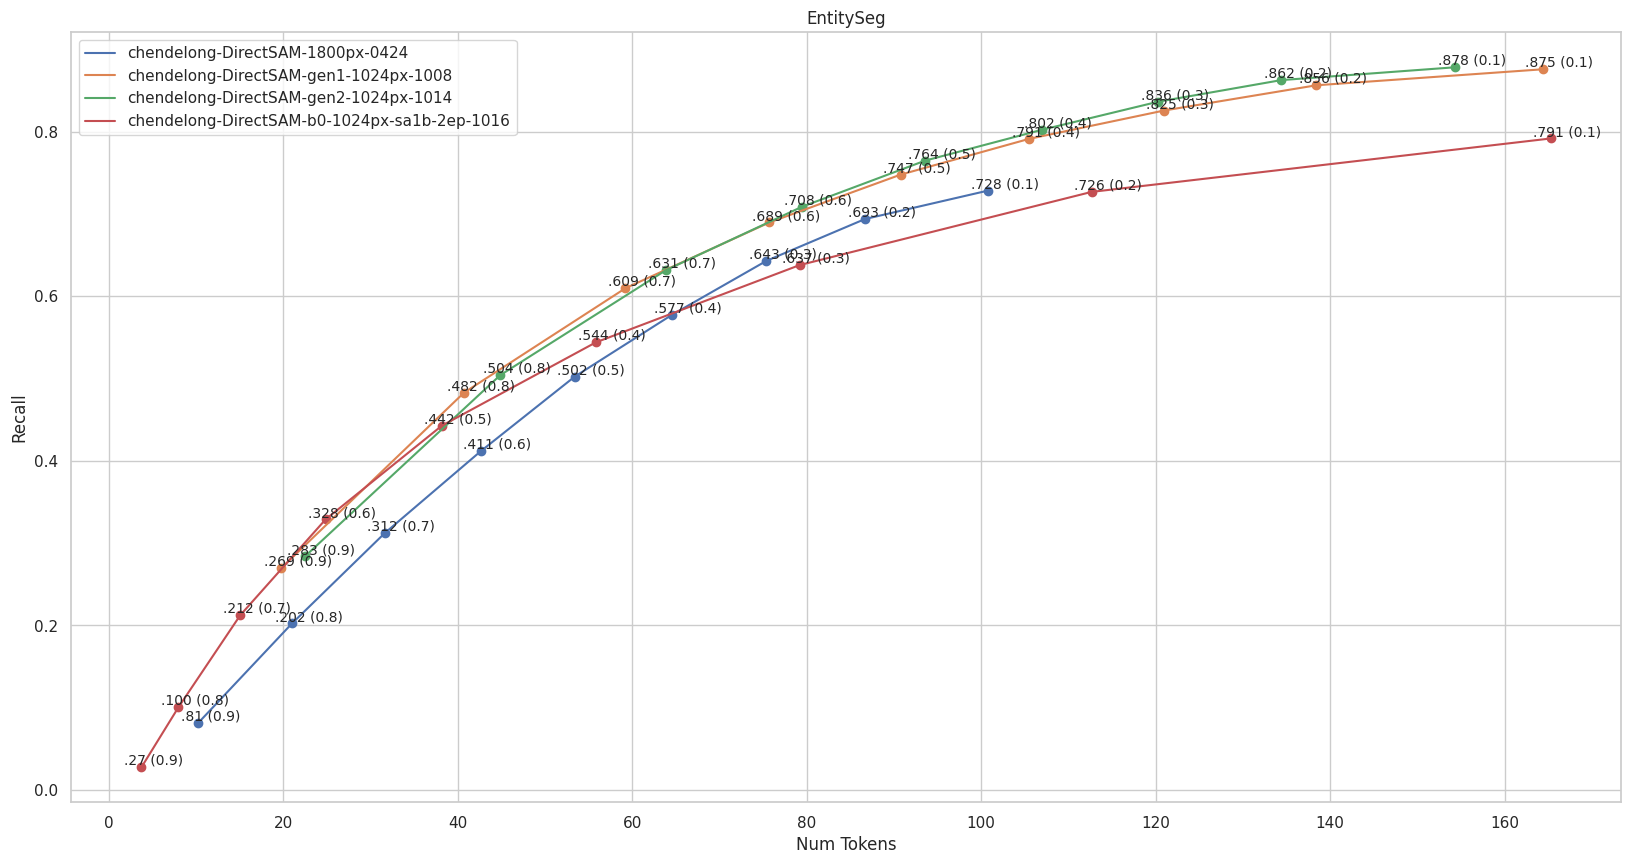

PascalPanopticParts
1006-2038-1024px-from-chendelong_DirectSAM-1800px-0424-checkpoint-20000
1010-1155-1024px-from-chendelong_DirectSAM-gen1-1024px-1008-checkpoint-20000
1016-0134-1024px-from-chendelong_DirectSAM-gen2-1024px-1014-checkpoint-10000
chendelong-DirectSAM-1800px-0424
chendelong-DirectSAM-b0-1024px-sa1b-2ep-1016
chendelong-DirectSAM-gen1-1024px-1008
chendelong-DirectSAM-gen2-1024px-1014
	chendelong-DirectSAM-1800px-0424:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
	chendelong-DirectSAM-gen1-1024px-1008:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
	chendelong-DirectSAM-gen2-1024px-1014:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
	chendelong-DirectSAM-b0-1024px-sa1b-2ep-1016:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


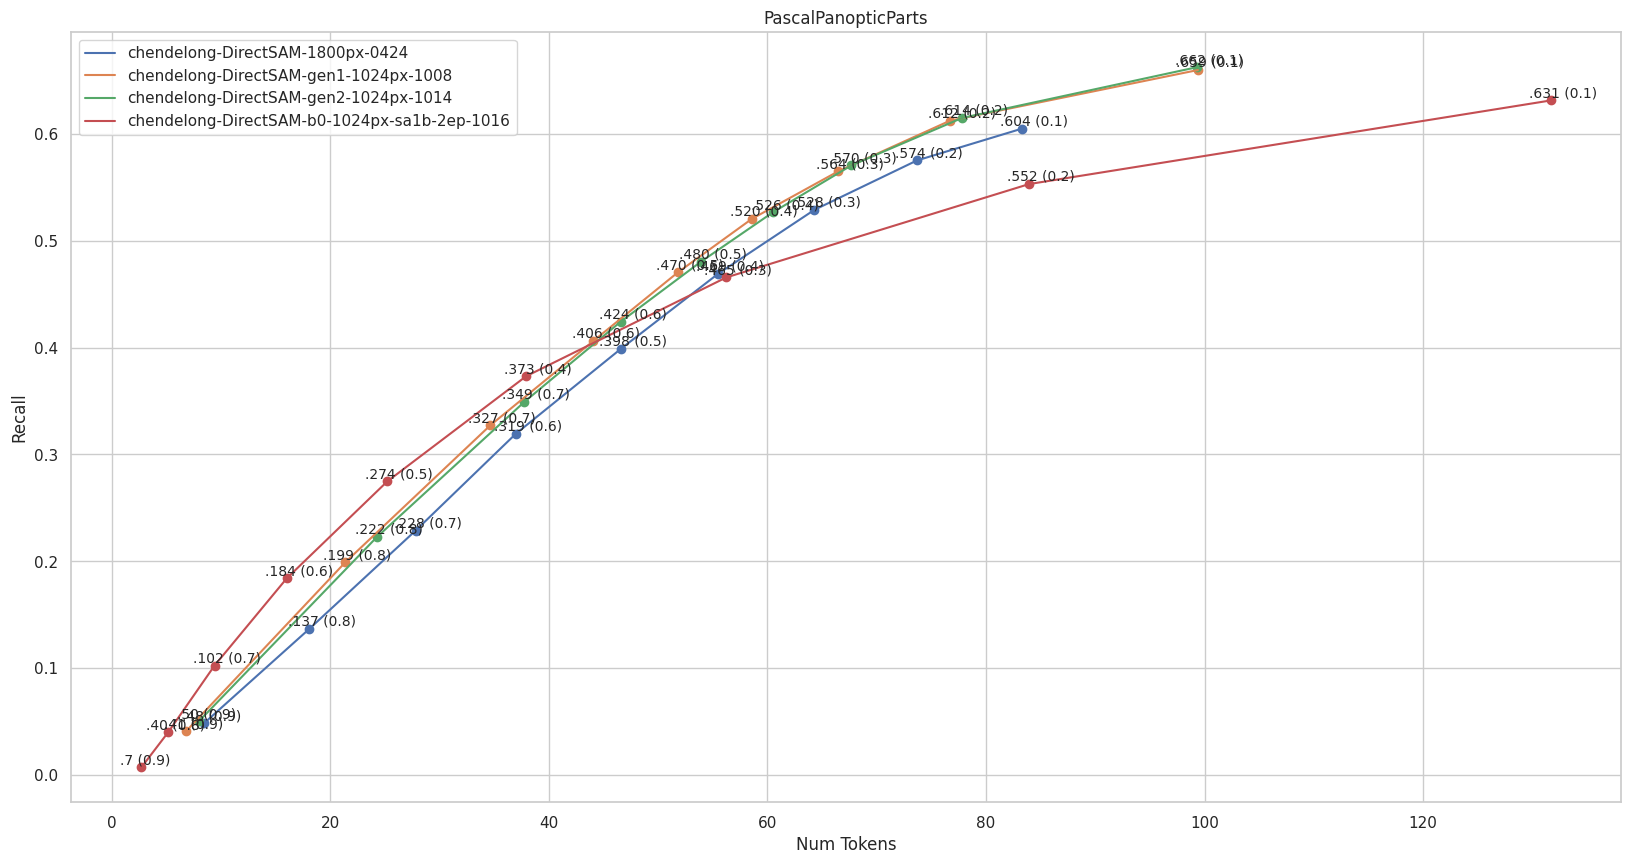

SA1B_116
1010-1155-1024px-from-chendelong_DirectSAM-gen1-1024px-1008-checkpoint-20000
1016-0134-1024px-from-chendelong_DirectSAM-gen2-1024px-1014-checkpoint-10000
chendelong-DirectSAM-1800px-0424
chendelong-DirectSAM-b0-1024px-sa1b-2ep-1016
chendelong-DirectSAM-gen1-1024px-1008
chendelong-DirectSAM-gen2-1024px-1014
	chendelong-DirectSAM-1800px-0424:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
	chendelong-DirectSAM-gen1-1024px-1008:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
	chendelong-DirectSAM-gen2-1024px-1014:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
	chendelong-DirectSAM-b0-1024px-sa1b-2ep-1016:	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


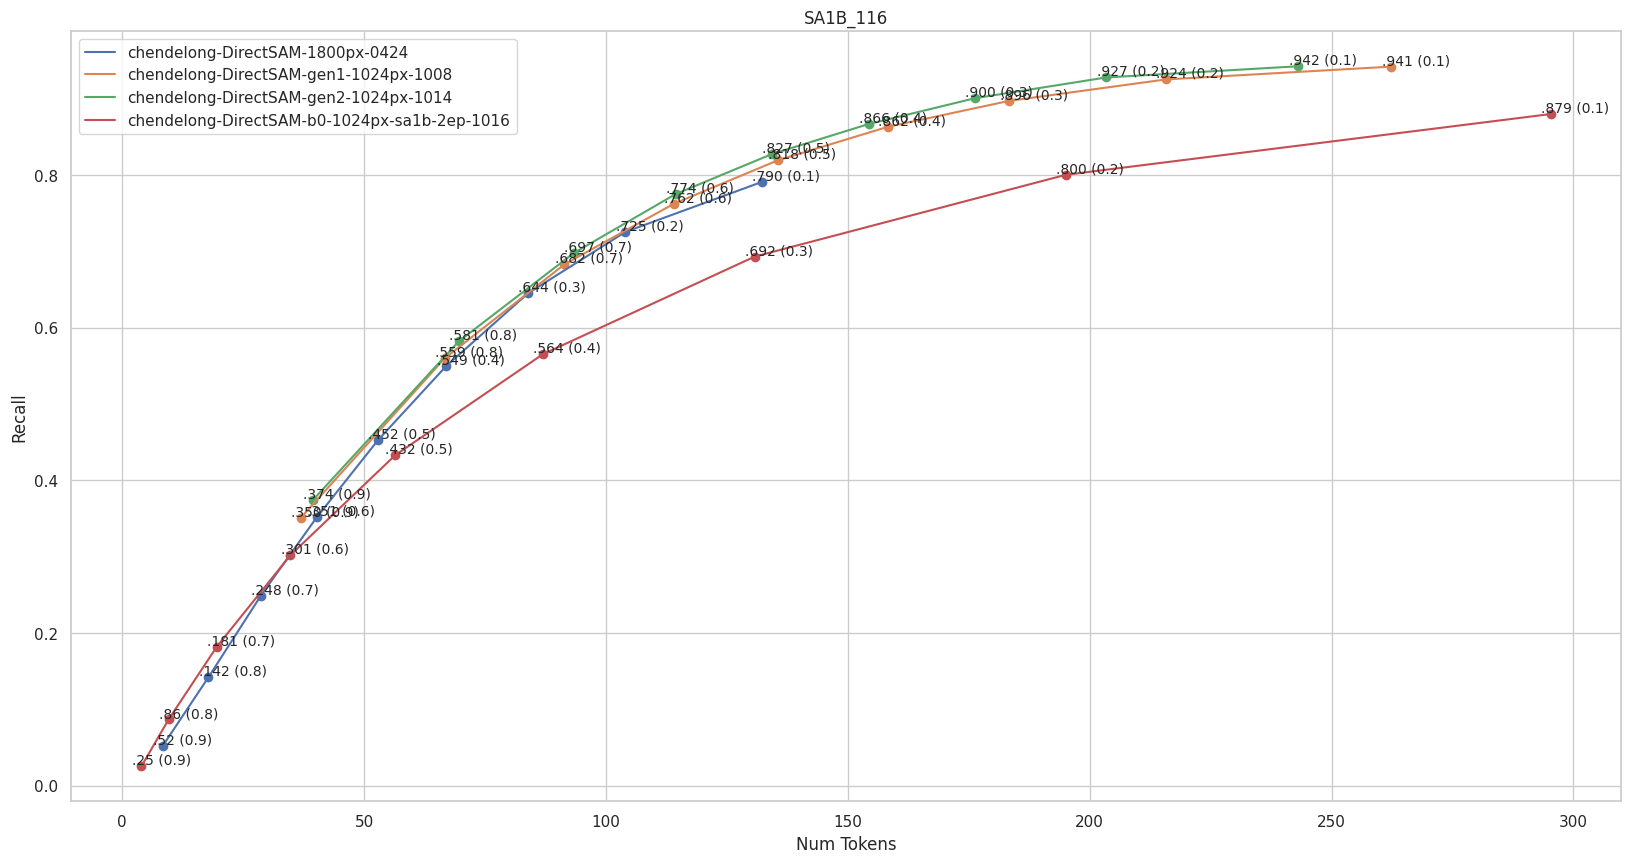

In [2]:
for dataset in datasets:
    plt.figure(figsize=(20, 10))
    print(dataset)
    models = list(results[dataset].keys())
    models.sort()
    for model in models:
        print(model)

    models = [
        'chendelong-DirectSAM-1800px-0424', 
        'chendelong-DirectSAM-gen1-1024px-1008',
        'chendelong-DirectSAM-gen2-1024px-1014',
        'chendelong-DirectSAM-b0-1024px-sa1b-2ep-1016'
        ]

    # for model, model_results in results[dataset].items():
    for model in models:
        model_results = results[dataset][model]
        thresholds = list(model_results.keys())
        thresholds.sort()
        print(f'\t{model}:\t{thresholds}')

        recalls = [model_results[threshold][0] for threshold in thresholds]
        tokens = [model_results[threshold][1] for threshold in thresholds]

        plt.plot(tokens, recalls, label=model)
        plt.scatter(tokens, recalls)

        for i, txt in enumerate(thresholds):
            plt.annotate(f'.{int(recalls[i]*1000)} ({txt})', (tokens[i]-2, recalls[i]+0.003), fontsize=10)

        plt.xlabel('Num Tokens')
        plt.ylabel('Recall')
        plt.title(dataset)
        plt.legend()
    plt.show()